In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
encoder = OrdinalEncoder()

from sklearn.cluster import KMeans

In [53]:
data = pd.read_csv("/content/churn.csv")

#1. data preparation
data_cluster = data.copy()
data_cluster = data_cluster.drop(['customerID', 'TotalCharges'], axis=1)

#standardize 'tenure' and 'MonthlyCharges' columns
scaler = StandardScaler()
data_cluster[['tenure', 'MonthlyCharges']] = scaler.fit_transform(data_cluster[['tenure', 'MonthlyCharges']])

#encode categorical columns (excluding 'tenure' and 'MonthlyCharges')
non_numeric_columns = data_cluster.columns[~data_cluster.columns.isin(['tenure', 'MonthlyCharges'])]
data_cluster[non_numeric_columns] = encoder.fit_transform(data_cluster[non_numeric_columns])

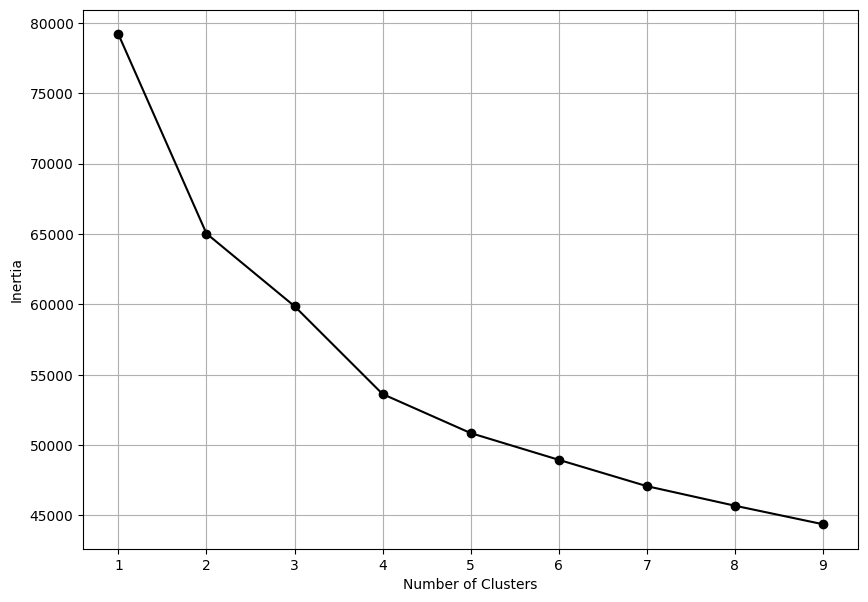

In [54]:
#2 finding optimal number of clusters using K-Means
def find_optimal_k(data, max_k):
    cluster_range = []
    inertia_values = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(data)
        cluster_range.append(k)
        inertia_values.append(kmeans.inertia_)

    #inertia to determine optimal clusters
    fig = plt.subplots(figsize=(10, 7))
    plt.plot(cluster_range, inertia_values, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

find_optimal_k(data_cluster, 10)

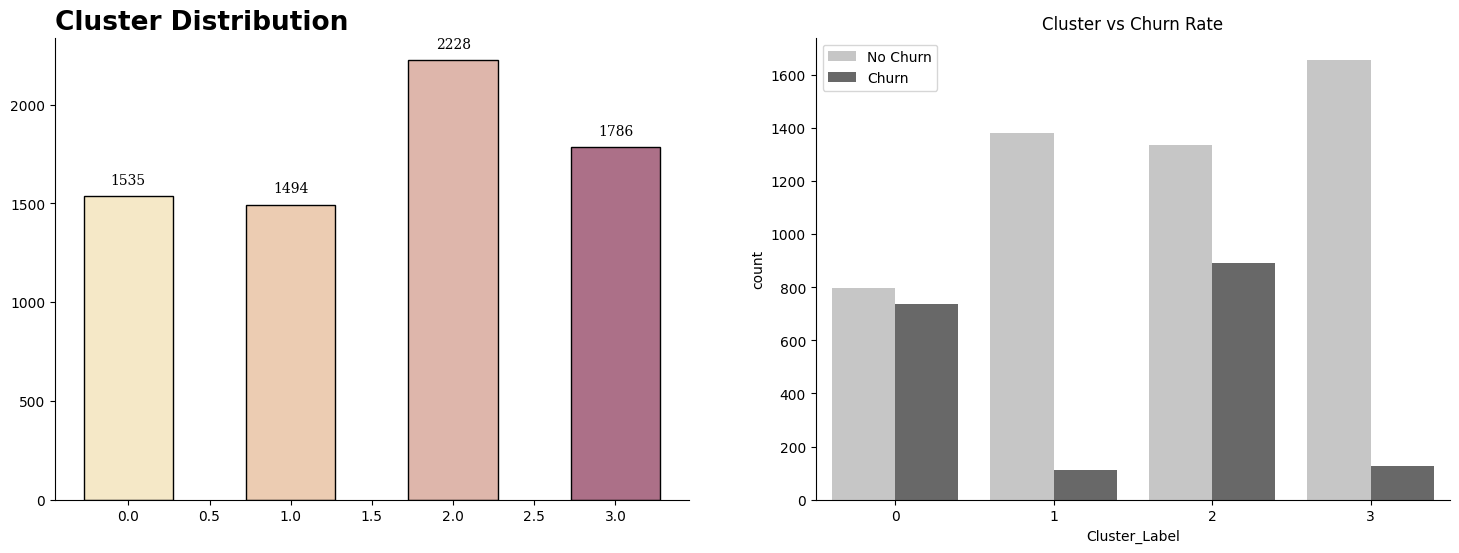

In [55]:
#3 K-Means clustering
kmeans_model = KMeans(n_clusters=4, random_state=10)
kmeans_model.fit(data_cluster)

#assign cluster labels to the data
data_cluster['Cluster_Label'] = kmeans_model.labels_

#distribution of clusters
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
cluster_counts = data_cluster['Cluster_Label'].value_counts().sort_index()
ax[0].bar(cluster_counts.index, cluster_counts, edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088'], width=0.55)
ax[0].set_title('Cluster Distribution', loc='left', fontsize=19, fontweight='bold')

#annotate cluster counts on the bar chart
for i in cluster_counts.index:
    ax[0].annotate(f"{cluster_counts[i]}", xy=(i, cluster_counts[i] + 80), va='center', ha='center', fontweight='light', fontfamily='serif', color='black')
for side in ['top', 'right']:
    ax[0].spines[side].set_visible(False)

#churn rate by cluster
sns.countplot(x='Cluster_Label', hue="Churn", palette="Greys", data=data_cluster)
sns.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster vs Churn Rate")
plt.show()

<ipython-input-56-a2eb038cf097>:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.histplot(data=data, x="tenure", hue="Cluster_Label", element="step", palette=bright_colors, linewidth=2, line_kws={"linewidth": 3, 'alpha': 0.7})


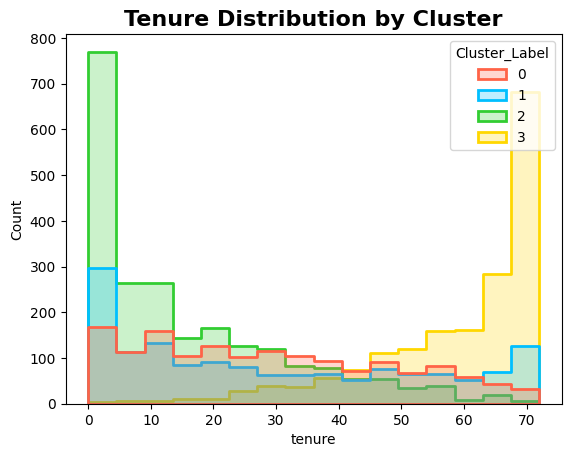

In [56]:
# tenure distribution by cluster
data['Cluster_Label'] = data_cluster['Cluster_Label']

bright_colors = ["#FF6347", "#00BFFF", "#32CD32", "#FFD700", "#FF1493"]

# thicker lines and a palette for better contrast
sns.histplot(data=data, x="tenure", hue="Cluster_Label", element="step", palette=bright_colors, linewidth=2, line_kws={"linewidth": 3, 'alpha': 0.7})
plt.title('Tenure Distribution by Cluster', fontsize=16, weight='bold')
plt.show()

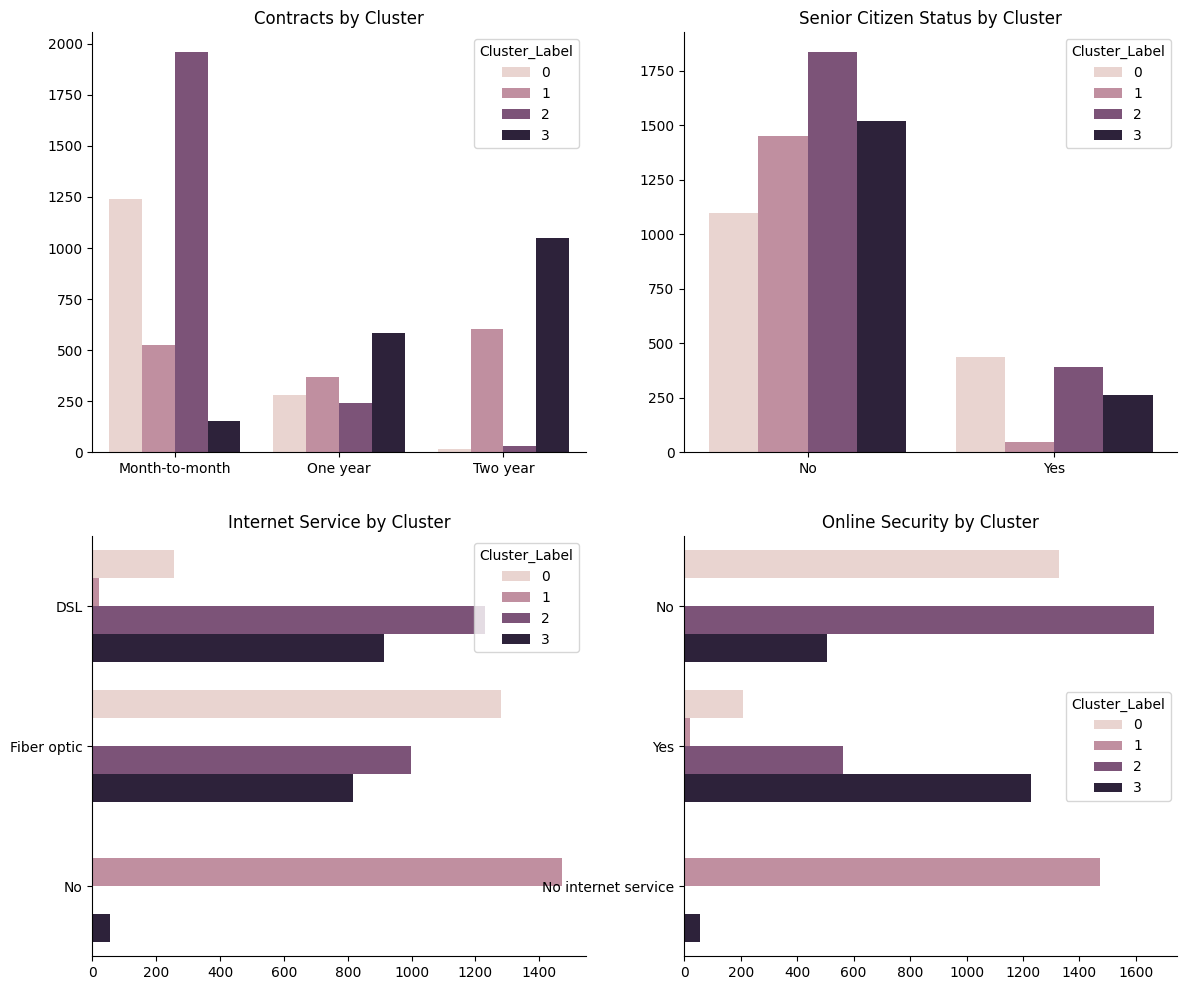

In [57]:
# categorical variable distributions by cluster
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.despine()

# Color palette for churn/no churn
colors = ["#553939", "#808080", "#A27B5C", "#A9A9A9"]
sns.set_palette(sns.color_palette(colors))

# visualizations for various categorical features
sns.countplot(x="Contract", hue="Cluster_Label", data=data, ax=axes[0, 0]).set(title='Contracts by Cluster', xlabel=None, ylabel=None)
# map '0' to 'No' and '1' to 'Yes' in the 'SeniorCitizen' column
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
sns.countplot(x="SeniorCitizen", hue="Cluster_Label", data=data, ax=axes[0, 1]).set(title='Senior Citizen Status by Cluster', xlabel=None, ylabel=None)
sns.countplot(y='InternetService', hue="Cluster_Label", data=data, ax=axes[1, 0]).set(title='Internet Service by Cluster', xlabel=None, ylabel=None)
sns.countplot(y='OnlineSecurity', hue="Cluster_Label", data=data, ax=axes[1, 1]).set(title='Online Security by Cluster', xlabel=None, ylabel=None)

sns.despine()